In [1]:
import pandas as pd  
import numpy as np
import quandl   # Access to stock data

from datetime import date
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


In [2]:
# Create an empty DataFrame variable to store stock data
StockPrices = pd.DataFrame()

# Sets the start and end times for stock data
start = date(2016,12,30)
end = date(2017,12,31)

# Create a list of stock symbols
ticker_list = ['AAPL', 'MSFT', 'XOM', 'JNJ', 'JPM', 'AMZN', 'GE', 'FB', 'T']
# ticker_list = [ 'GM', 'TSLA']
# Using a loop, you get the data for each stock in turn and store the adjusted closing price
for ticker in ticker_list:
    data = quandl.get('WIKI/'+ticker, start_date=start, end_date=end)
    StockPrices[ticker] = data['Adj. Close']  # there is a space between Adj. and Close
    
# The first 5 lines of output data

print(StockPrices.head())

                  AAPL       MSFT        XOM         JNJ        JPM    AMZN  \
Date                                                                          
2016-12-30  114.389454  60.788710  86.960273  112.310940  84.383167  749.87   
2017-01-03  114.715378  61.219142  87.567241  112.925087  85.302395  753.67   
2017-01-04  114.586983  60.945231  86.603799  112.739868  85.458859  757.18   
2017-01-05  115.169696  60.945231  85.312787  113.919421  84.672217  780.45   
2017-01-06  116.453639  61.473488  85.264615  113.373512  84.682050  795.99   

                   GE      FB          T  
Date                                      
2016-12-30  30.782801  115.05  40.476170  
2017-01-03  30.870473  116.86  40.942507  
2017-01-04  30.880215  118.69  40.704580  
2017-01-05  30.704870  120.67  40.590375  
2017-01-06  30.792542  123.41  39.790940  


In [3]:
# Calculate the daily rate of return and discard the missing values
StockReturns = StockPrices.pct_change().dropna()
# The first 5 lines of output data
print(StockReturns.head())

                AAPL      MSFT       XOM       JNJ       JPM      AMZN  \
Date                                                                     
2017-01-03  0.002849  0.007081  0.006980  0.005468  0.010893  0.005068   
2017-01-04 -0.001119 -0.004474 -0.011002 -0.001640  0.001834  0.004657   
2017-01-05  0.005085  0.000000 -0.014907  0.010463 -0.009205  0.030732   
2017-01-06  0.011148  0.008668 -0.000565 -0.004792  0.000116  0.019912   
2017-01-09  0.009160 -0.003183 -0.016497 -0.000172  0.000697  0.001168   

                  GE        FB         T  
Date                                      
2017-01-03  0.002848  0.015732  0.011521  
2017-01-04  0.000316  0.015660 -0.005811  
2017-01-05 -0.005678  0.016682 -0.002806  
2017-01-06  0.002855  0.022707 -0.019695  
2017-01-09 -0.004745  0.012074 -0.012585  


In [4]:
# # read data from csv
# StockReturns = pd.read_csv('StockReturns2017.csv', parse_dates=['Date'], index_col='Date')

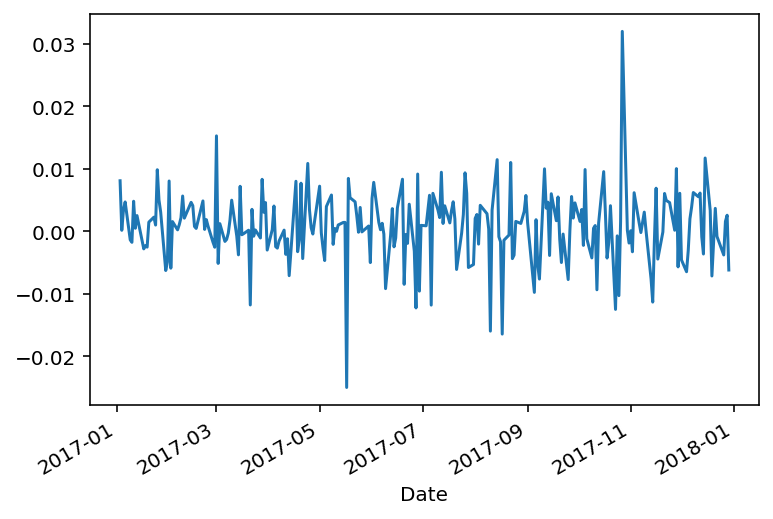

In [5]:
# Set the combination weight and store it as a numpy array type
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Copy the return rate data to the new variable stock_return, this is for the convenience of subsequent calls
stock_return = StockReturns.copy()

# Calculate weighted stock returns
WeightedReturns = stock_return.mul(portfolio_weights, axis=1)

# Calculate the return on the portfolio
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot portfolio returns over time
StockReturns.Portfolio.plot()
plt.show()

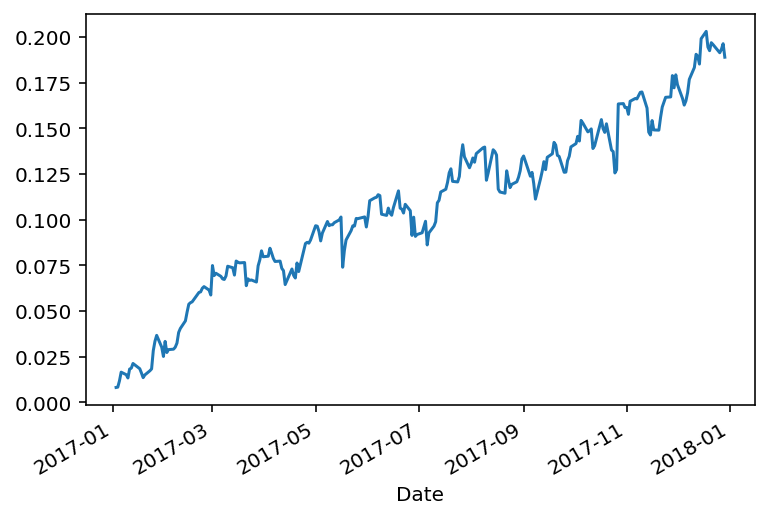

In [6]:
# Calculate the cumulative portfolio income and plot
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [7]:
# Cumulative income curve drawing function
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1+StockReturns[name]).cumprod()-1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.show()

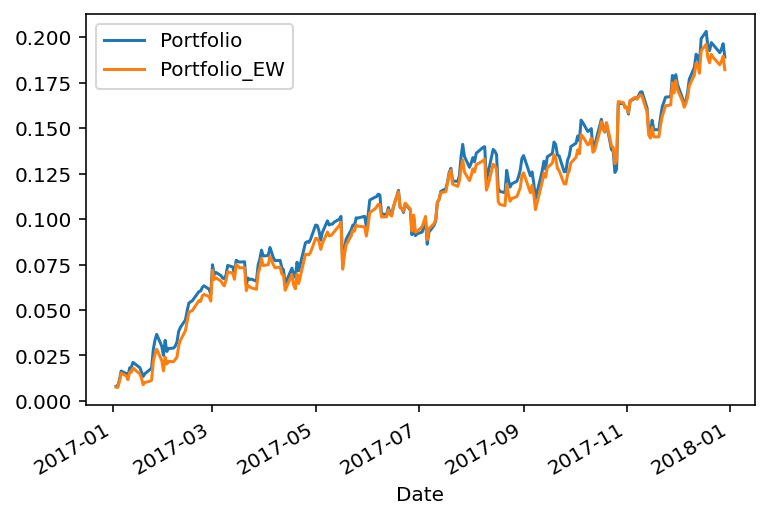

In [8]:
# Set the number of stocks in the portfolio
numstocks = 9

# Equally distribute the weight of each item
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the return of equal weight portfolio
StockReturns['Portfolio_EW'] = stock_return.mul(portfolio_weights_ew, axis=1)  \
                                           .sum(axis=1)

# Plot the cumulative return curve
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

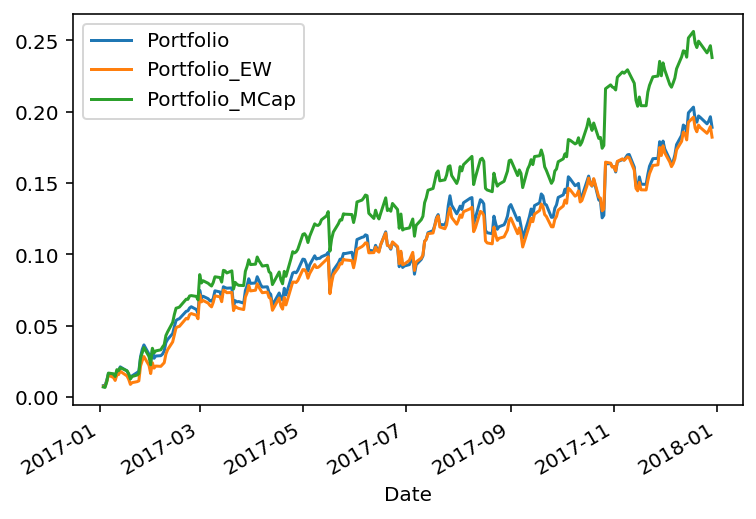

In [9]:
# Create an array of market capitalization
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 
                                   356.94, 268.88, 331.57, 246.09])

# Calculate market value weight
mcap_weights = market_capitalizations / np.sum(market_capitalizations)

# Calculate market value-weighted portfolio returns
StockReturns['Portfolio_MCap'] = stock_return.mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

In [10]:
# Calculate correlation matrix
correlation_matrix = stock_return.corr()

# Output correlation matrix
print(correlation_matrix)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  1.000000  0.436104  0.063337  0.030635  0.197596  0.506639  0.002801   
MSFT  0.436104  1.000000  0.085906  0.227071  0.195753  0.621833 -0.044486   
XOM   0.063337  0.085906  1.000000  0.132549  0.300892  0.021084  0.180453   
JNJ   0.030635  0.227071  0.132549  1.000000  0.074452  0.048620  0.068477   
JPM   0.197596  0.195753  0.300892  0.074452  1.000000  0.014245  0.260649   
AMZN  0.506639  0.621833  0.021084  0.048620  0.014245  1.000000 -0.094063   
GE    0.002801 -0.044486  0.180453  0.068477  0.260649 -0.094063  1.000000   
FB    0.542663  0.549501 -0.048242  0.078149  0.093780  0.653162 -0.021957   
T     0.004983 -0.019970  0.194238  0.095602  0.242841 -0.014819  0.284551   

            FB         T  
AAPL  0.542663  0.004983  
MSFT  0.549501 -0.019970  
XOM  -0.048242  0.194238  
JNJ   0.078149  0.095602  
JPM   0.093780  0.242841  
AMZN  0.653162 -0.014819  
GE   -0.021957  0.284551  
FB 

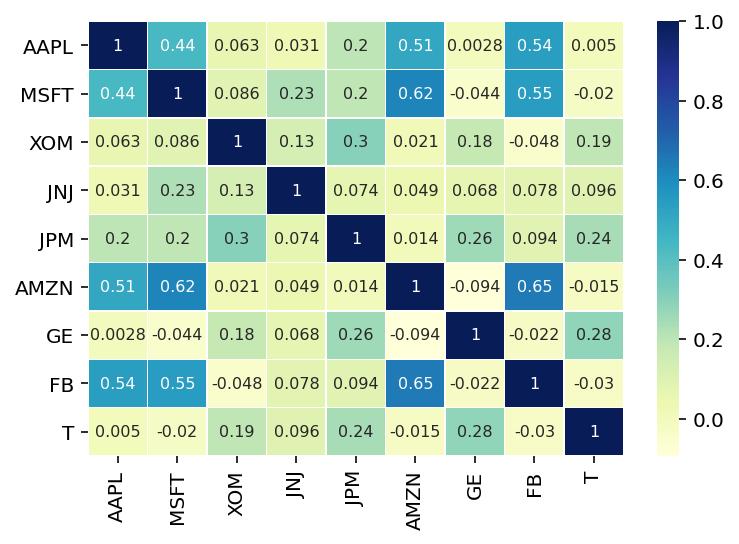

In [11]:
# import seaborn
import seaborn as sns

# create heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [12]:
# Calculate the covariance matrix
cov_mat = stock_return.cov()

# Annualized covariance matrix
cov_mat_annual = cov_mat * 252

# Output covariance matrix
print(cov_mat_annual)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.031577  0.011494  0.001268  0.000622  0.005721  0.018938  0.000099   
MSFT  0.011494  0.022000  0.001435  0.003850  0.004731  0.019401 -0.001313   
XOM   0.001268  0.001435  0.012688  0.001707  0.005522  0.000500  0.004045   
JNJ   0.000622  0.003850  0.001707  0.013067  0.001387  0.001169  0.001558   
JPM   0.005721  0.004731  0.005522  0.001387  0.026546  0.000488  0.008451   
AMZN  0.018938  0.019401  0.000500  0.001169  0.000488  0.044248 -0.003937   
GE    0.000099 -0.001313  0.004045  0.001558  0.008451 -0.003937  0.039601   
FB    0.016428  0.013885 -0.000926  0.001522  0.002603  0.023406 -0.000744   
T     0.000152 -0.000508  0.003755  0.001876  0.006791 -0.000535  0.009719   

            FB         T  
AAPL  0.016428  0.000152  
MSFT  0.013885 -0.000508  
XOM  -0.000926  0.003755  
JNJ   0.001522  0.001876  
JPM   0.002603  0.006791  
AMZN  0.023406 -0.000535  
GE   -0.000744  0.009719  
FB 

In [13]:
# Calculate the standard deviation of the portfolio
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, 
                                      np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08963508863777028


In [14]:
# Set the number of simulations
number = 10000
# Set up an empty numpy array to store the weight, rate of return and standard deviation obtained in each simulation
random_p = np.empty((number, 11))
# Set random number seed, here is to repeat the result
np.random.seed(123)

# Recursively simulate 10,000 random portfolios
for i in range(number):
    # Generate 9 random numbers and normalize them to get a set of random weight data
    random9 = np.random.random(9)
    random_weight = random9 / np.sum(random9)
    
    # Calculate the annualized average rate of return
    mean_return = stock_return.mul(random_weight, axis=1).sum(axis=1).mean()
    annual_return = (1 + mean_return)**252 - 1

    # Calculate the annualized standard deviation, also called volatility
    random_volatility = np.sqrt(np.dot(random_weight.T, 
                                       np.dot(cov_mat_annual, random_weight)))

    # Store the weights generated above, the calculated rate of return and standard deviation into the array random_p
    random_p[i][:9] = random_weight
    random_p[i][9] = annual_return
    random_p[i][10] = random_volatility
    
# Convert numpy array into DataFrame data frame
RandomPortfolios = pd.DataFrame(random_p)
# Set the name of each column of the data frame RandomPortfolios
RandomPortfolios.columns = [ticker + "_weight" for ticker in ticker_list]  \
                         + ['Returns', 'Volatility']

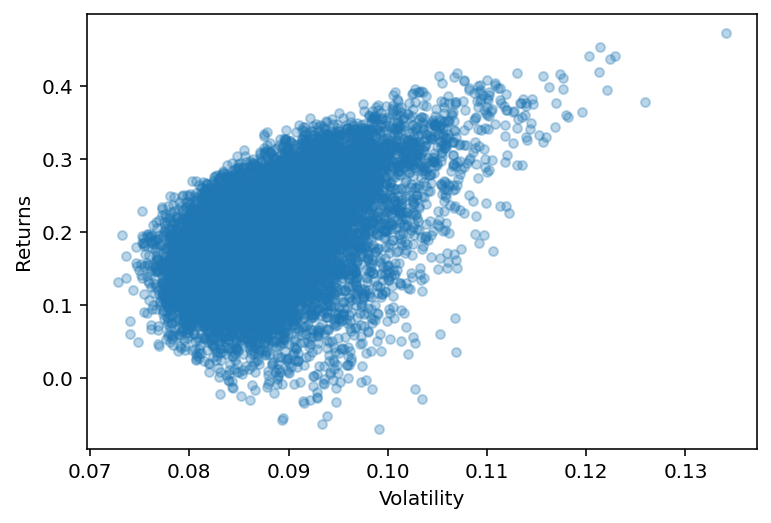

In [15]:
# Draw a scatter chart
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
plt.show()

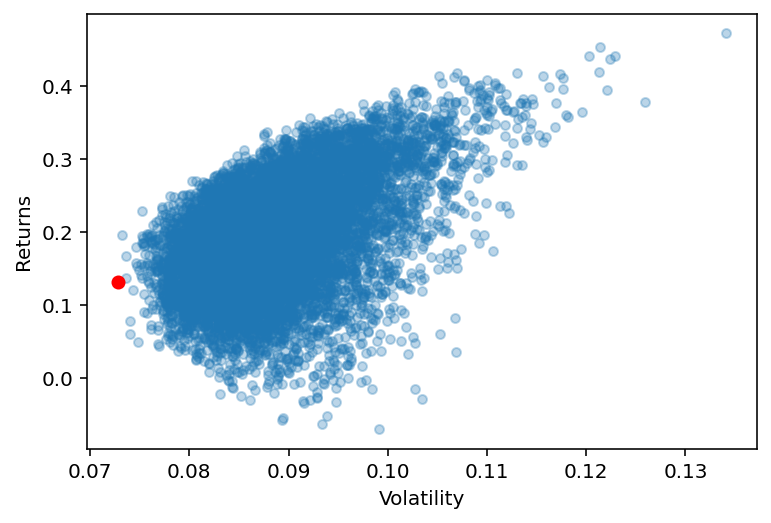

In [16]:
# Find the index value of the data with the smallest standard deviation
min_index = RandomPortfolios.Volatility.idxmin()

# Highlight the point with the least risk in the return-risk scatter chart
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[min_index,'Volatility']
y = RandomPortfolios.loc[min_index,'Returns']
plt.scatter(x, y, color='red')   
plt.show()

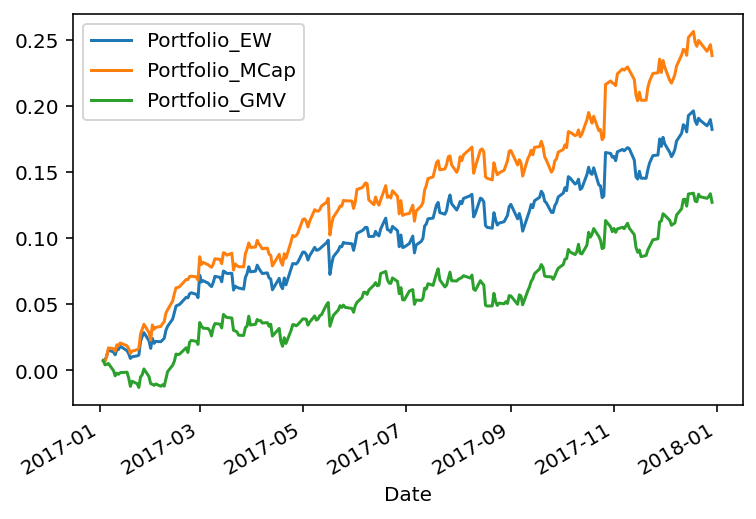

In [17]:
# Extract the weight corresponding to the minimum fluctuation combination and convert it into a Numpy array
GMV_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])

# Calculate GMV portfolio income
StockReturns['Portfolio_GMV'] = stock_return.mul(GMV_weights, axis=1).sum(axis=1)

#Plot the cumulative return curve
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_GMV'])